<a href="https://colab.research.google.com/github/jedhenik/EDA_Global_Terrorism/blob/main/Copy_of_Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

# **Importing libraries**

In [ ]:
import pandas as pd
import numpy as np

# **Importing dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path='/content/drive/MyDrive/EDA_GLOBAL_TERRORISM/Copy of Global Terrorism Data.csv'
df = pd.read_csv(path,encoding = 'ISO-8859-1', low_memory=False)
print(df)

# **Check data**

In [ ]:
df.shape

In [ ]:
df.head()

In [ ]:
for i in df.columns:
  print(i)

In [ ]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [ ]:
df.dtypes

eventid        int64
iyear          int64
imonth         int64
iday           int64
approxdate    object
               ...  
INT_LOG        int64
INT_IDEO       int64
INT_MISC       int64
INT_ANY        int64
related       object
Length: 135, dtype: object

# **Cleaning of Dataset**

Find out total no of NAN values in dataframe.

In [ ]:
a=((df.isnull().sum()).sum())/(df.size)*100
a

56.481718962414206

In [ ]:
x=df.isnull().sum().sum()
x

13853997

In [ ]:
y=df.size
y

24528285

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
Task=[]

In [ ]:
Task.append(x)

In [ ]:
Task.append(y-x)

In [ ]:
Task

[13853997, 10674288]

In [ ]:
my_labels = 'missing','non_missing'
plt.pie(Task,labels=my_labels,autopct='%1.1f%%')
plt.title('My Tasks')
plt.axis('equal')
plt.show()

Find missing values by column

In [ ]:
plot_width, plot_height = (16,18)
plt.rcParams['figure.figsize'] = (plot_width,plot_height)

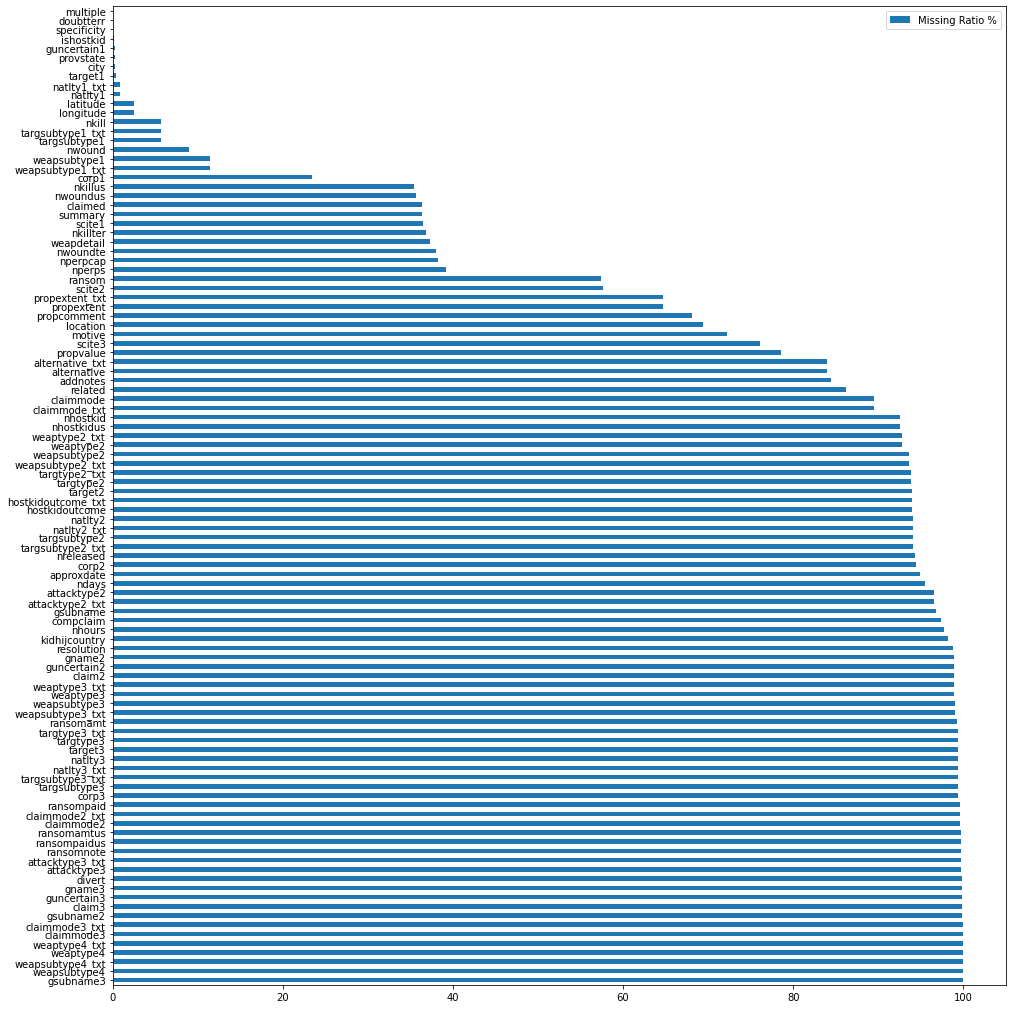

In [ ]:
import matplotlib.pyplot as plt
def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh")
        plt.show()
    else:
        print('No NAs found')
plot_nas(df)

delete columns which have null values grater than 30%

In [ ]:
a=df.isnull().sum()/len(df)*100
a

eventid        0.000000
iyear          0.000000
imonth         0.000000
iday           0.000000
approxdate    94.914993
                ...    
INT_LOG        0.000000
INT_IDEO       0.000000
INT_MISC       0.000000
INT_ANY        0.000000
related       86.219461
Length: 135, dtype: float64

In [ ]:
b=[]
c=df.columns
for i in range(len(c)):
  if a[i]<30:
    b.append(c[i])

In [ ]:
b

In [ ]:
len(b)

In [ ]:
df.property

In [ ]:
df.info()

In [ ]:
df.describe()

Also drop all columns where missing vakues grater than 150000


In [ ]:
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [ ]:
df=df.dropna(thresh=150000,axis=1)

In [ ]:
df.shape

(181691, 47)

Now delete rows as there are also missing values( even in required columns just to reduce size of dataframe)

In [ ]:
df=df.dropna()

In [ ]:
df.shape

(134042, 47)

Now we will look for any duplicate rows

In [ ]:
df.duplicated().sum()

0

WE have to check each column to know its useful for EDA in Excel.
For that we have to choose right columns for EDA.

In [ ]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':"day",'gname':'Group','country_txt':'Country','region_txt':'Region',
                     'provstate':'State','city':'City','latitude':'latitude','longitude':'longitude','summary':'summary',
                     'attacktype1_txt':'Attacktype','targtype1_txt':'Targettype','weaptype1_txt':'Weapon','nkill':'kill',
                     'nwound':'Wound','extended':'extended'},inplace=True)

In [ ]:
df=df[['Year','Month','day','Country','State','Region','City','latitude','longitude',"Attacktype",'kill',
               'Wound','target1','Group','Targettype','Weapon','extended']]

In [ ]:
df.shape